In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn import svm
from matplotlib.colors import ListedColormap

from IPython.core.display import display, HTML
lemmatiser = WordNetLemmatizer()

In [82]:
data_table=pd.read_csv('author_text.csv')
from sklearn.utils import shuffle
data_table = shuffle(data_table)

def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation] #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a+=b+' '
    # 3. Removal of Stopwords
    return a
#     return [word for word in a.split() if word.lower() not 
#             in stopwords.words('english')]

y = data_table['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y) #[1, 0, 1, ..., 0, 1, 1] each text - numbber 0,1 - depending on author

In [83]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [84]:
data_table[:20]

,Unnamed: 0,Text,Author
7130,3606,"“I’d have thought, in District Eleven, you’d h...",SC
1781,3174,"“Not if you don’t give us away, Peeves, please.”",JR
6874,4032,“Merry Christmas!”,JR
4727,1983,someone you wished you knew. But it took sever...,SC
9808,3490,"A foul, rotten taste pervades my mouth, and th...",SC
11358,6032,drinking Elixir of Life. My brain surprises ev...,JR
297,405,and starts for the front of the stage. “More t...,SC
7529,3936,down a row of books and started pulling them o...,JR
3417,1943,"down under the covers. The stress of the day, ...",SC
7568,1011,“But —” I begin.,SC


For a moment, everything seems frozen in time. Then the apples spill to the ground and I’m
SC


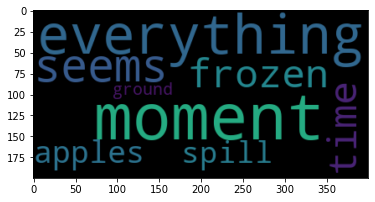

his eyes fixed on the door. Any second now, Professor McGonagall would come back and lead
JR


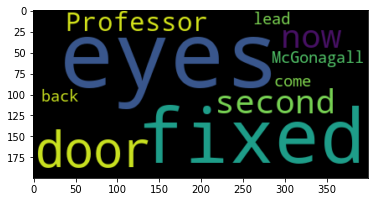

In [85]:
X = data_table['Text'] #всі частинки тексту

wordcloud2 = WordCloud().generate(X[1]) # for JR
wordcloud1 = WordCloud().generate(X[2]) # for SC

print(X[2])
print(data_table['Author'][2]) #author name
plt.imshow(wordcloud1, interpolation='bilinear') #показати картинкою
plt.show()

print(X[1])
print(data_table['Author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

In [86]:
X.to_frame()

,Text
7130,"“I’d have thought, in District Eleven, you’d h..."
1781,"“Not if you don’t give us away, Peeves, please.”"
6874,“Merry Christmas!”
4727,someone you wished you knew. But it took sever...
9808,"A foul, rotten taste pervades my mouth, and th..."
...,...
7176,contracting with anxiety and guilt at the sigh...
3027,asleep.
7265,Harry was going to ask Ron if he’d had any of ...
4178,like the one Gale and I heard when the redhead...


In [87]:
X= X.apply(text_process)

In [88]:
X.to_frame()

,Text
7130,“I’d have think in District Eleven you’d have ...
1781,“Not if you don’t give us away Peeves please”
6874,“Merry Christmas”
4727,someone you wish you know But it take several ...
9808,A foul rotten taste pervade my mouth and the w...
...,...
7176,contract with anxiety and guilt at the sight o...
3027,asleep
7265,Harry be go to ask Ron if he’d have any of the...
4178,like the one Gale and I hear when the redheade...


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234) #(80%->Training and 20%->Validation)

vectorizer = TfidfVectorizer(min_df=5,
                                 max_df = 0.8,
                                 sublinear_tf=True,
                                 use_idf=True)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)



In [90]:
#svm classification
classifier_rbf = svm.SVC(C=10)
classifier_rbf.fit(train_vectors, y_train)

print(classifier_rbf.score(train_vectors, y_train)) #середня точність даних training
print(classifier_rbf.score(test_vectors, y_test))#середня точність даних testing

0.9940038684719535
0.9013921113689095


In [91]:
#0
#a="report home to the Dursleys saying that he’d somehow turned his teacher’s wig blue. He kept"
#0
# a="Samantha sometimes found Miles absurd and, increasingly, dull. Every now and then, though, she enjoyed his pomposity in precisely the same spirit as she liked"
#1
a="Deep in the meadow, hidden far away A cloak of leaves, a moonbeam ray Forget your woes and let your troubles lay And when it's morning again, they'll wash away Here it's safe, here it's warm Here the daisies guard you from every harm Here your dreams are sweet and tomorrow brings them true Here is the place where I love you."
b=np.array([a])
X_testSentence=pd.Series(b)

testSentance=vectorizer.transform(X_testSentence)
#JR - 0, SC - 1
print('Predicted value: ', classifier_rbf.predict(testSentance)) #should be 1

Predicted value:  [1]


In [92]:
predictions = classifier_rbf.predict(test_vectors)
# getting the Precision, Recall, F1-Score = 2 * (precision * recall) / (precision + recall)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1207
           1       0.90      0.92      0.91      1379

    accuracy                           0.90      2586
   macro avg       0.90      0.90      0.90      2586
weighted avg       0.90      0.90      0.90      2586



Normalized confusion matrix
[[0.88318144 0.11681856]
 [0.0826686  0.9173314 ]]


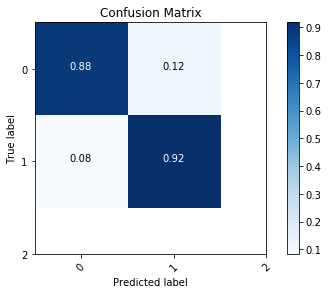

In [93]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2], normalize=True,
                      title='Confusion Matrix')


In [78]:
# with open('hunger_games.txt', encoding='utf-8', newline='') as f:
#     contents = f.read().replace('\n','')

# with open('hunger_games_splited.txt',  encoding='utf-8',mode='w') as f:
#     f.write(contents.replace('. ', '.\n'))
    
# with open('harry_potter.txt', encoding='utf-8', newline='') as f:
#     contents = f.read().replace('\n','')

# with open('harry_potter_splited.txt',  encoding='utf-8',mode='w') as f:
#     f.write(contents.replace('. ', '.\n'))

# file1=open('hunger_games_splited.txt',  encoding='utf-8', newline='')
# file2=open('harry_potter_splited.txt',  encoding='utf-8', newline='')
# with open('all_filw.txt',  encoding='utf-8',mode='w') as f:
#     for line in file1:
#         if not line.strip():continue
#         f.write(line)
#     for line in file2:
#         if not line.strip():continue
#         f.write(line)
# file=open('all_filw.txt',  encoding='utf-8',newline='')
# with open('all_films.csv',  encoding='utf-8',mode='w') as f:
    
#     for line in file:
#         if not line.strip():continue
#         f.write(line)
# file.close()


# data1 = pd.read_csv("hunger_games.csv") 
# data2 = pd.read_csv("harry_potter.csv") 

# frames=[data1,data2]
# result_file=pd.concat(frames)

# from sklearn.utils import shuffle
# df = shuffle(result_file)